# Retail Sales Analysis – Week 2, Day 1

## Business Questions
1. Revenue by Product Category
2. Sales Seasonality
3. Customer Demographics

## Dataset
Source: Kaggle – Retail Sales Dataset (mohammadtalib786)


In [1]:
import pandas as pd

df = pd.read_csv("retail_sales_dataset.csv")

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [3]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [4]:
df.isna().sum

<bound method DataFrame.sum of      Transaction ID   Date  Customer ID  Gender    Age  Product Category  \
0             False  False        False   False  False             False   
1             False  False        False   False  False             False   
2             False  False        False   False  False             False   
3             False  False        False   False  False             False   
4             False  False        False   False  False             False   
..              ...    ...          ...     ...    ...               ...   
995           False  False        False   False  False             False   
996           False  False        False   False  False             False   
997           False  False        False   False  False             False   
998           False  False        False   False  False             False   
999           False  False        False   False  False             False   

     Quantity  Price per Unit  Total Amount  
0       Fa

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df['calculated_total'] = df['Quantity'] * df['Price per Unit']
(df['calculated_total'] == df['Total Amount']).value_counts()

True    1000
Name: count, dtype: int64

In [9]:
df.sample

<bound method NDFrame.sample of      Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  calculated

In [10]:
df.sample()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,calculated_total
934,935,2023-09-09,CUST935,Female,34,Beauty,1,50,50,50


In [11]:
df = df.drop(columns=['calculated_total'])

In [12]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [13]:
df.sample

<bound method NDFrame.sample of      Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0        

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


# Day 2: Feature Engineering and Data Quality Check

In [15]:
df['Year'] = df['Date'].dt.year

In [16]:
df['Year']

0      2023
1      2023
2      2023
3      2023
4      2023
       ... 
995    2023
996    2023
997    2023
998    2023
999    2023
Name: Year, Length: 1000, dtype: int32

In [17]:
(df['Year'] == 2023).value_counts()

Year
True     998
False      2
Name: count, dtype: int64

In [18]:
df['Year'] != 2023

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Year, Length: 1000, dtype: bool

In [19]:
df['Month_name'] = df['Date'].dt.month_name()

In [20]:
df['Day'] = df['Date'].dt.day

In [21]:
df['Day_name'] = df['Date'].dt.day_name()

In [22]:
df.sample()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_name,Day,Day_name
184,185,2023-02-27,CUST185,Male,24,Clothing,1,25,25,2023,February,27,Monday


In [23]:
df.sample()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_name,Day,Day_name
943,944,2023-06-05,CUST944,Male,44,Clothing,2,25,50,2023,June,5,Monday


In [24]:
df['Month'] = df['Date'].dt.month

In [25]:
df.sample()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_name,Day,Day_name,Month
746,747,2023-11-15,CUST747,Male,23,Beauty,1,30,30,2023,November,15,Wednesday,11


In [26]:
df = df[['Transaction ID',	'Date',	'Customer ID',	'Gender',	'Age',	'Product Category',	'Quantity',	'Price per Unit', 'Total Amount',	'Year',	'Month', 'Month_name', 	'Day',	'Day_name'	]]

In [27]:
df.sample()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_name,Day,Day_name
500,501,2023-05-14,CUST501,Male,39,Electronics,2,30,60,2023,5,May,14,Sunday


In [28]:
df[df['Year'] != 2023]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_name,Day,Day_name
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,1,January,1,Monday
649,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30,2024,1,January,1,Monday


In [29]:
df[df['Age'] < 18]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_name,Day,Day_name


In [30]:
df[df['Price per Unit'] <= 0]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_name,Day,Day_name


In [31]:
df[df['Age'] < 100]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_name,Day,Day_name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November,24,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February,27,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January,13,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May,21,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May,6,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,5,May,16,Tuesday
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,11,November,17,Friday
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,October,29,Sunday
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,December,5,Tuesday


In [32]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [34]:
df.groupby(['Month', 'Month_name'])['Total Amount'].sum().droplevel(0)

Month_name
January      36980
February     44060
March        28990
April        33870
May          53150
June         36715
July         35465
August       36960
September    23620
October      46580
November     34920
December     44690
Name: Total Amount, dtype: int64

In [35]:
df.groupby('Day_name')['Total Amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).round(2)

Day_name
Monday       481.16
Tuesday      431.30
Wednesday    422.81
Thursday     437.68
Friday       463.57
Saturday     525.43
Sunday       424.64
Name: Total Amount, dtype: float64

In [36]:
df.pivot_table(
    values='Total Amount',
    index=['Month','Month_name'],
    columns='Product Category',
    aggfunc='sum'
).droplevel(0)

Product Category,Beauty,Clothing,Electronics
Month_name,,,
January,13930,13125,9925
February,14035,14560,15465
March,10545,15065,3380
April,11905,13940,8025
May,12450,17455,23245
June,10995,10170,15550
July,16090,8250,11125
August,9790,12455,14715
September,6320,9975,7325


## Day 3: Aggregation and Segmentation

In this section, we aggregate transaction-level data into business-level metrics.
The goal is to understand revenue distribution across product categories,
customer demographics, and time dimensions.

### Overall Business Metrics

In [37]:
business_review = pd.DataFrame({
    'revenue' : [df['Total Amount'].sum()],
    'transactions' : [df['Transaction ID'].count()],
    'aov' : [df['Total Amount'].mean()]
    })
business_review.index = ['']
business_review

,revenue,transactions,aov
,456000,1000,456.0


### Revenue and Average Ticket by Product Category

In [38]:
df.groupby('Product Category').agg(revenue = ('Total Amount', 'sum'),
    transactions = ('Transaction ID', 'count'),
    aov = ('Total Amount', 'mean')
    ).round(2)

,revenue,transactions,aov
Product Category,,,
Beauty,143515,307,467.48
Clothing,155580,351,443.25
Electronics,156905,342,458.79


### Customer Behavior by Gender

In [39]:
df.groupby('Gender').agg(
    revenue = ('Total Amount', 'sum'),
    transactions = ('Transaction ID', 'count'),
    aov = ('Total Amount', 'mean')
).round(2)

,revenue,transactions,aov
Gender,,,
Female,232840,510,456.55
Male,223160,490,455.43


### Average Transaction Value by Day of Week

In [40]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Day name'] = df['Date'].dt.day_name()

In [41]:
df.groupby('Day name')['Total Amount'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).round(2)

Day name
Monday       481.16
Tuesday      431.30
Wednesday    422.81
Thursday     437.68
Friday       463.57
Saturday     525.43
Sunday       424.64
Name: Total Amount, dtype: float64

## Day 3: Aggregation and Segmentation

In this section, we aggregate transaction-level data into business-level metrics 
to understand revenue drivers and customer behavior.

### Overall Business Metrics
We calculated total revenue, number of transactions, and average order value (AOV) 
to get a high-level view of business performance.

### Revenue and AOV by Product Category
We compared product categories by total revenue, number of transactions, and average order value 
to identify key revenue drivers and pricing differences.

### Customer Behavior by Gender
We analyzed revenue and transaction volume by gender to understand demographic differences 
in purchasing behavior.

### Average Transaction Value by Day of Week
We evaluated average order value across days of the week and observed higher spending on Saturdays, 
suggesting potential opportunities for targeted promotions.

### Age Segmentation Insights

In [71]:
Age_group = pd.cut(df['Age'], bins = [18,26,36,46,61,100], 
                   labels = ['18–25','26–35','36–45','46–60','60+'],
                   right = False)
df.groupby(Age_group, observed=True).agg(
    revenue = ('Total Amount', 'sum'),
    transactions = ('Transaction ID', 'count'),
    aov = ('Total Amount', 'mean')
).round(2)

,revenue,transactions,aov
Age,,,
18–25,84550,169,500.30
26–35,98480,205,480.39
36–45,91870,202,454.80
46–60,147875,331,446.75
60+,33225,93,357.26


In [43]:
result = df.groupby(['Day name', 'Product Category'])['Total Amount'].mean()
result.unstack().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).round(2)

Product Category,Beauty,Clothing,Electronics
Day name,,,
Monday,623.59,397.28,431.30
Tuesday,363.48,431.36,507.20
Wednesday,363.93,465.20,430.32
Thursday,471.28,432.45,407.57
Friday,577.16,469.10,355.92
Saturday,473.57,533.64,563.68
Sunday,393.87,389.39,483.90


### Weekend vs Weekday Analysis

In [44]:
def is_weekend(day):
    if pd.isna(day):
        return 'Unknown'
    elif day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
df['Day type'] = df['Day name'].apply(is_weekend)
result = df.groupby('Day type')['Total Amount'].mean().round(2)

weekday_aov = result.loc['Weekday']
weekend_aov = result.loc['Weekend']

pct_diff = (weekend_aov - weekday_aov) / weekday_aov * 100

pct_diff
print(pct_diff.round(2))
print(df.groupby('Day type')['Total Amount'].count())

6.64
Day type
Weekday    712
Weekend    288
Name: Total Amount, dtype: int64


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

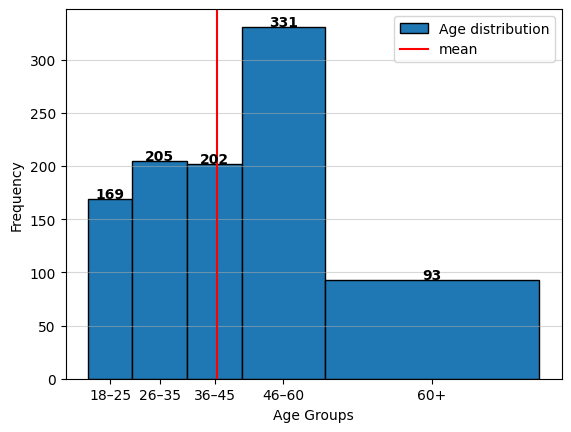

In [73]:
clean_data = df['Age'].dropna()

n, bins_edges, patches = plt.hist(clean_data, bins=[18,26,36,46,61,100],
         label='Age distribution', edgecolor = 'black')
plt.xticks([22.0, 31.0, 41.0, 53.5, 80.5],
          ['18–25', '26–35', '36–45', '46–60', '60+'])
for patch, count in zip(patches, n):
    plt.text(patch.get_x() + patch.get_width()/2, 
             patch.get_height() + 1,
             f'{int(count)}',
             ha='center', 
             fontsize=10,
             fontweight='bold')
plt.title('Transactions by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.axvline(clean_data.mean(), color = 'red', label='mean' )
plt.grid(True, alpha = 0.5 , axis = 'y')
plt.legend()
plt.show()



In [63]:
bins=[18,26,36,46,60,100]
centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
print(centers)  # [21.5, 30.0, 40.0, 52.5, 80.0]

[22.0, 31.0, 41.0, 53.0, 80.0]


In [67]:
# Сколько всего строк?
print(f"Всего строк: {len(df)}")

# Сколько уникальных транзакций?
print(f"Уникальных транзакций: {df['Transaction ID'].nunique()}")

# Есть ли дубликаты транзакций?
duplicates = df['Transaction ID'].duplicated().sum()
print(f"Дублирующихся строк: {duplicates}")

Всего строк: 1000
Уникальных транзакций: 1000
Дублирующихся строк: 0


In [74]:

print("=== ДЕТАЛЬНАЯ ПРОВЕРКА ===")

# 1. Groupby по возрастным группам
age_group = pd.cut(df['Age'], bins=[18, 26, 36, 46, 61, 100], 
                   labels=['18–25','26–35','36–45','46–60','60+'], right =False )

groupby_counts = df.groupby(age_group, observed=True)['Transaction ID'].count()
print("Транзакций по groupby:")
print(groupby_counts)
print(f"Сумма: {groupby_counts.sum()}")

# 2. Histogram
clean_data = df['Age'].dropna()
n, _, _ = plt.hist(clean_data, bins=[18, 26, 36, 46, 61, 100])
plt.close()
print("\nСтрок по histogram:")
print(n.astype(int))
print(f"Сумма: {int(n.sum())}")

# 3. Есть ли NaN в Age?
print(f"\nПропуски в Age: {df['Age'].isna().sum()}")
print(f"Всего строк в df: {len(df)}")
print(f"Строк с Age (без NaN): {len(clean_data)}")

=== ДЕТАЛЬНАЯ ПРОВЕРКА ===
Транзакций по groupby:
Age
18–25    169
26–35    205
36–45    202
46–60    331
60+       93
Name: Transaction ID, dtype: int64
Сумма: 1000

Строк по histogram:
[169 205 202 331  93]
Сумма: 1000

Пропуски в Age: 0
Всего строк в df: 1000
Строк с Age (без NaN): 1000


In [78]:
# Проверим граничные значения
print("=== ГРАНИЧНЫЕ ЗНАЧЕНИЯ ===")

# Сколько людей ровно 26, 36, 46, 61 лет?
for age in [26, 36, 46, 61]:
    count = (df['Age'] == age).sum()
    print(f"Возраст {age}: {count} человек")

# Куда их относит pd.cut?
test_ages = [18,25, 26, 35, 36, 45, 46, 60, 61]
test_groups = pd.cut(test_ages, bins=[18, 26, 36, 46, 61, 100], 
                     labels=['18–25','26–35','36–45','46–60','60+'], right= False)
print("\nКуда попадают граничные значения (pd.cut):")
for age, group in zip(test_ages, test_groups):
    print(f"  {age} → {group}")

=== ГРАНИЧНЫЕ ЗНАЧЕНИЯ ===
Возраст 26: 22 человек
Возраст 36: 15 человек
Возраст 46: 25 человек
Возраст 61: 18 человек

Куда попадают граничные значения (pd.cut):
  18 → 18–25
  25 → 18–25
  26 → 26–35
  35 → 26–35
  36 → 36–45
  45 → 36–45
  46 → 46–60
  60 → 46–60
  61 → 60+


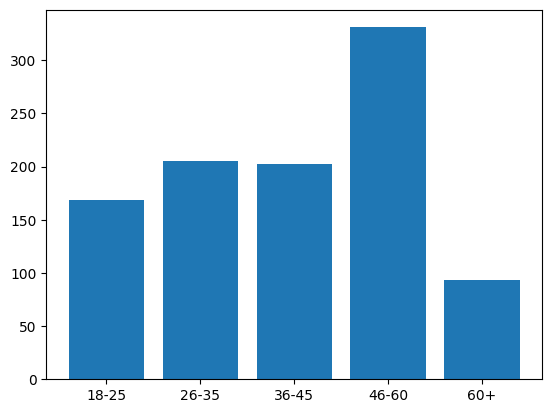

In [79]:
categories = ['18-25', '26-35', '36-45', '46-60', '60+']
values = [169, 205, 202, 331, 93]

plt.bar(categories, values)
plt.show()

64
18
0


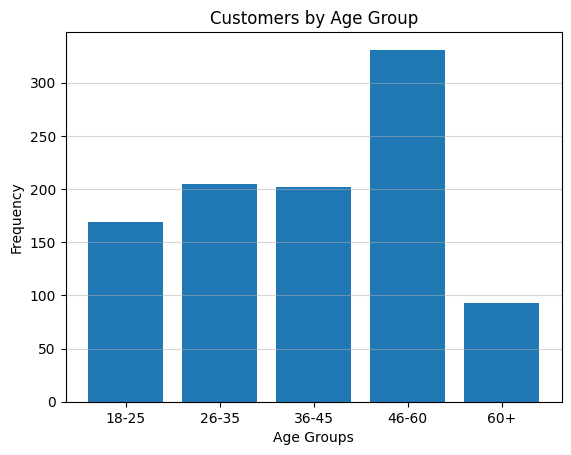

In [109]:
mx= df['Age'].max()
mn= df['Age'].min()
print(mx)
print(mn)
if mn < 18 or mx > 100:
    raise ValueError('Внимание!!! Исправь bins!!!!')
else:
    values = pd.cut(df['Age'], bins=[18, 26, 36, 46, 61, 101 ],
                    labels=['18-25', '26-35', '36-45', '46-60', '60+'],
                    right= False)
print(values.isna().sum())
x = values.value_counts().sort_index()
plt.bar(x.index, x)
plt.title('Customers by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.grid(True, alpha = 0.5 , axis = 'y')
plt.show()


Insight: The 46–60 age group represents the largest share of customers, while the 60+ segment is the smallest

Business implication: group 45-60 could be prioritized for retention strategies.

Data note: No records were lost during age binning (values.isna().sum() = 0)

In [87]:
values.value_counts()

Age
46-60    331
26-35    205
36-45    202
18-25    169
60+       93
Name: count, dtype: int64

## Week 2 – Day 4-5 Summary

Focus:
- Data visualization fundamentals
- Choosing the right chart type for the question

What was done:
- Customer age distribution (histogram)
- Age segmentation using business-defined bins
- Bar chart for categorical comparison
- Data quality checks before visualization

Key takeaway:
- Visualization is an analytical argument, not decoration
- Histogram for distribution, bar chart for comparison